In [ ]:
# 4.統計入門
# 4.1 記述統計
import numpy as np
import pandas as pd

x = [165, 170, 175, 180, 185]
np.mean(x) # リストの場合



175.0

In [ ]:
x = np.array( # アレイ
    [165, 170, 175, 180, 185]
)
x.mean()
# np.mean(x)


175.0

In [ ]:
x = pd.Series( # シリーズ
    [165, 170, 175, 180, 185]
)
x.mean()
# np.mean(x)

175.0

In [ ]:
n = len(x) # サンプルサイズ
sum(x) / n

175.0

In [ ]:
y =[173, 174, 175, 176, 177]
np.mean(y)

175.0

In [ ]:
np.var(x, ddof=1) # xの分散

62.5

In [ ]:
np.var(y, ddof=1) # yの分散

2.5

In [ ]:
sum((x - np.mean(x))**2) / (n - 1)

62.5

In [ ]:
np.std(x, ddof=1) # xの標準偏差

7.905694150420948

In [ ]:
np.std(y, ddof=1) # yの標準偏差

1.5811388300841898

In [ ]:
np.var(x, ddof=1)**0.5 # xの標準偏差

7.905694150420948

In [ ]:
s = pd.Series(x)
s.describe()

count      5.000000
mean     175.000000
std        7.905694
min      165.000000
25%      170.000000
50%      175.000000
75%      180.000000
max      185.000000
dtype: float64

In [ ]:
x = [165, 170, 175, 180, 185]
np.var(x, ddof=1) # 不偏分散

62.5

In [ ]:
np.var(x, ddof=0) # 標本分散

50.0

In [ ]:
np.std(x, ddof=1) # √不偏分散

7.905694150420948

In [ ]:
np.std(x, ddof=0) # √標本分散

7.0710678118654755

In [ ]:
np.std(x, ddof=1) / len(x)**0.5

3.5355339059327373

In [ ]:
import numpy as np
import pandas as pd

my_df = pd.DataFrame({
    'name':    ['A', 'B', 'C', 'D'],
    'english': [ 60,  90,  70,  90],
    'math':    [ 70,  80,  90, 100],
    'gender':  ['f', 'm', 'm', 'f']})

In [ ]:
my_df['english'].var(ddof=1)
# np.var(my_df['english], ddof=1)

225.0

In [ ]:
my_df.var()
# my_df.apply('var)
# my_df.iloc[:, [1, 2].apply(lambda x: np.var(x, ddof=1))]

<ipython-input-22-a512afb3ebce>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  my_df.var()


english    225.000000
math       166.666667
dtype: float64

In [ ]:
my_df.describe()

,english,math
count,4.0,4.000000
mean,77.5,85.000000
std,15.0,12.909944
min,60.0,70.000000
25%,67.5,77.500000
50%,80.0,85.000000
75%,90.0,92.500000
max,90.0,100.000000


In [ ]:
from collections import Counter
Counter(my_df.gender)


Counter({'f': 2, 'm': 2})

In [ ]:
my_df.groupby('gender').apply(len)

gender
f    2
m    2
dtype: int64

In [ ]:
my_df2 = my_df.assign(
    excel=my_df.math >= 80
)
pd.crosstab(my_df2.gender, my_df2.excel)

excel,False,True
gender,,
f,1,1
m,0,2


In [ ]:
my_df.groupby('gender').mean()
# my_df.groupby('gender).agg('mean)
# my_df.groupby('gender).agg(np.mean())

<ipython-input-28-db97777ab1ca>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  my_df.groupby('gender').mean()


,english,math
gender,,
f,75.0,85.0
m,80.0,85.0


In [ ]:
# 4.2可視化
import numpy as np
import pandas as pd
import statsmodels.api as sm

iris = sm.datasets.get_rdataset('iris', 'datasets').data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[<Axes: title={'center': 'Sepal.Length'}>]], dtype=object)

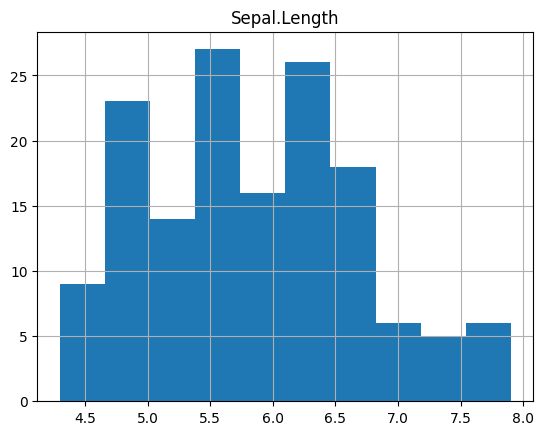

In [ ]:
iris.hist('Sepal.Length')

array([[<Axes: title={'center': 'x'}>]], dtype=object)

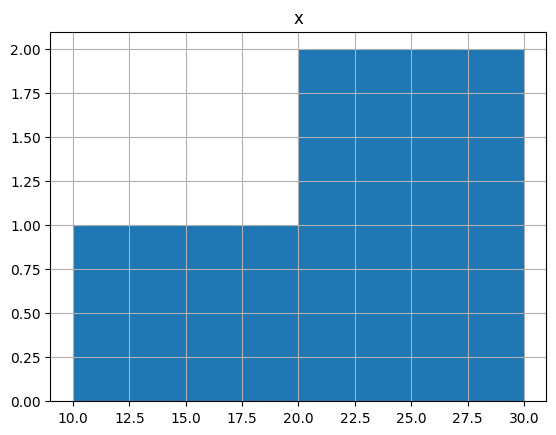

In [ ]:
my_df = pd.DataFrame(
    {'x': [10, 20, 30]}
)
my_df.hist('x', bins=2) # "階級数は2"

array([[<Axes: title={'center': 'Sepal.Length'}>]], dtype=object)

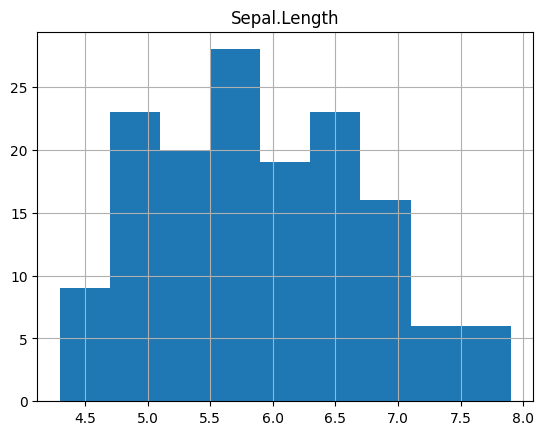

In [ ]:
x = iris['Sepal.Length']
tmp = np.linspace(min(x), max(x), 10)
iris.hist('Sepal.Length', bins=tmp.round(2))

<Axes: xlabel='Sepal.Length', ylabel='Sepal.Width'>

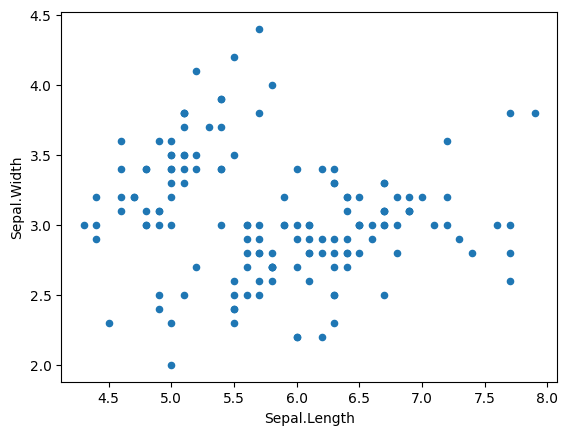

In [ ]:
iris.plot(
    'Sepal.Length',
    'Sepal.Width',
    kind = 'scatter'
)

<Axes: >

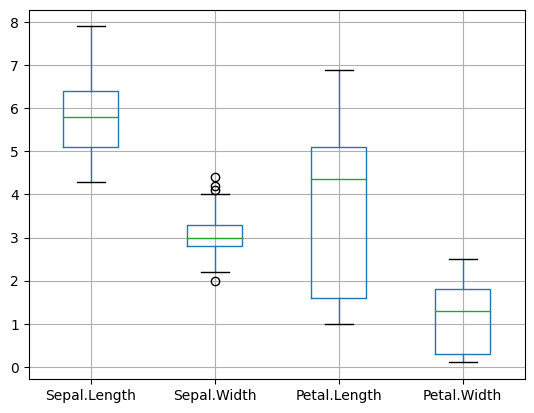

In [ ]:
iris.boxplot()

In [ ]:
pd.options.display.float_format = (
    '{: .2f}'.format
)
my_df = (iris.describe().transpose()
    [['mean', 'std']]
)
my_df['se'] = (
    my_df['std'] / len(iris)**0.5
)
my_df

,mean,std,se
Sepal.Length,5.84,0.83,0.07
Sepal.Width,3.06,0.44,0.04
Petal.Length,3.76,1.77,0.14
Petal.Width,1.20,0.76,0.06


<Axes: >

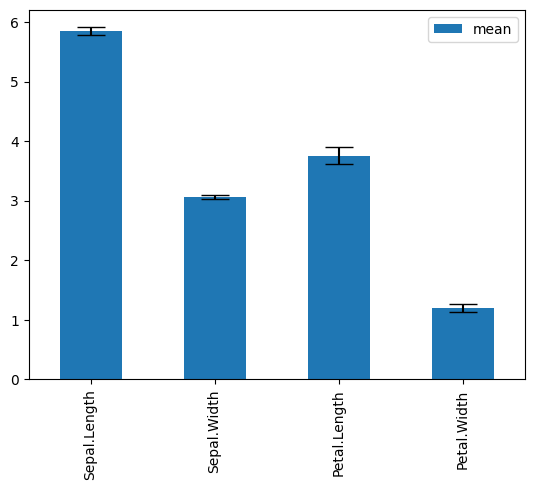

In [ ]:
my_df.plot(
    y='mean',
    kind='bar',
    yerr='se',
    capsize=10
)

In [ ]:
my_group = iris.groupby('Species')                        # 品種ごとに
my_df = my_group.agg('mean')                           # 各変数の平均と
my_se = my_group.agg(lambda x: x.std() / len(x)**0.5 )   # 標準偏差を求める
my_se

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,0.05,0.05,0.02,0.01
versicolor,0.07,0.04,0.07,0.03
virginica,0.09,0.05,0.08,0.04


<Axes: xlabel='Species'>

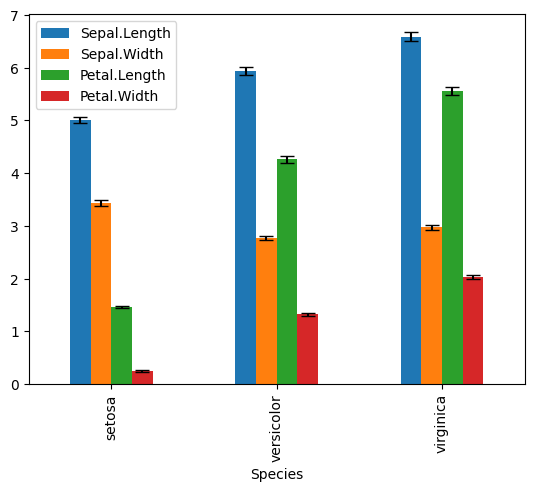

In [ ]:
my_group.agg('mean').plot(
    kind='bar',
    yerr=my_se,
    capsize=5
)

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

my_df = pd.DataFrame({
    'Species': iris.Species,
    'w_Sepal': iris['Sepal.Width'] > 3
})
my_table = pd.crosstab( # 分割表
    my_df['Species'],
    my_df['w_Sepal']
)
my_table


w_Sepal,False,True
Species,,
setosa,8,42
versicolor,42,8
virginica,33,17


(<Figure size 640x480 with 3 Axes>,
 {('setosa', 'True'): (0.0, 0.0, 0.33003300330033003, 0.8372093023255813),
  ('setosa', 'False'): (0.0,
   0.8405315614617939,
   0.33003300330033003,
   0.159468438538206),
  ('versicolor', 'True'): (0.334983498349835,
   0.0,
   0.33003300330033003,
   0.15946843853820597),
  ('versicolor', 'False'): (0.334983498349835,
   0.1627906976744186,
   0.33003300330033003,
   0.8372093023255813),
  ('virginica', 'True'): (0.66996699669967,
   0.0,
   0.3300330033003301,
   0.3388704318936877),
  ('virginica', 'False'): (0.66996699669967,
   0.34219269102990035,
   0.3300330033003301,
   0.6578073089700995)})

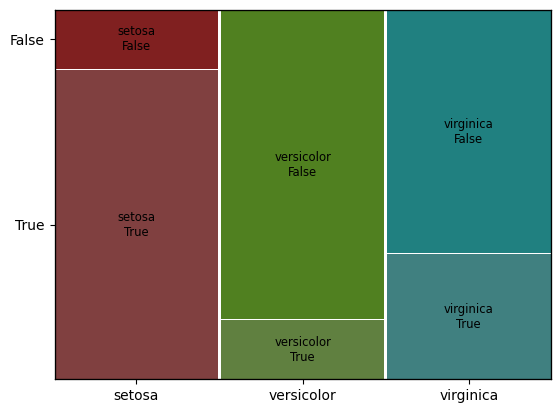

In [ ]:
mosaic(
    my_df,
    index=['Species', 'w_Sepal']
)

(<Figure size 640x480 with 3 Axes>,
 {('setosa', 'True'): (0.0, 0.0, 0.33003300330033003, 0.8372093023255813),
  ('setosa', 'False'): (0.0,
   0.8405315614617939,
   0.33003300330033003,
   0.159468438538206),
  ('versicolor', 'True'): (0.334983498349835,
   0.0,
   0.33003300330033003,
   0.15946843853820597),
  ('versicolor', 'False'): (0.334983498349835,
   0.1627906976744186,
   0.33003300330033003,
   0.8372093023255813),
  ('virginica', 'True'): (0.66996699669967,
   0.0,
   0.3300330033003301,
   0.3388704318936877),
  ('virginica', 'False'): (0.66996699669967,
   0.34219269102990035,
   0.3300330033003301,
   0.6578073089700995)})

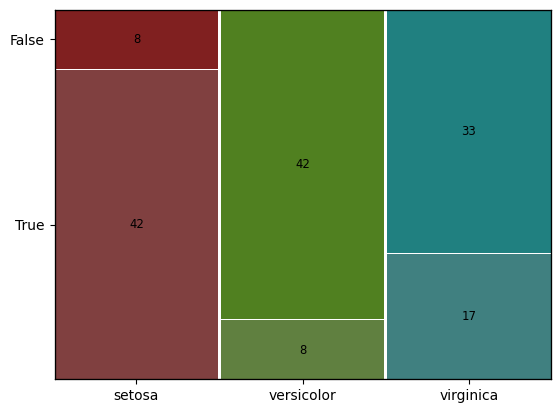

In [ ]:
my_table.columns = [str(x) for x in my_table.columns]
my_table.index =    [str(x) for x in my_table.index]
mosaic(
    my_df,
    index=['Species', 'w_Sepal'],
    labelizer=lambda k: my_table.loc[k]
)

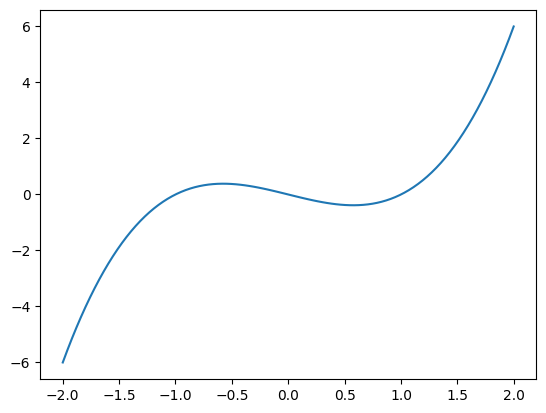

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 2, 100)
y = x**3 - x

plt.plot(x, y)

In [ ]:
# 4.3 乱数
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng()


(array([1680., 1630., 1700., 1701., 1690., 1599.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

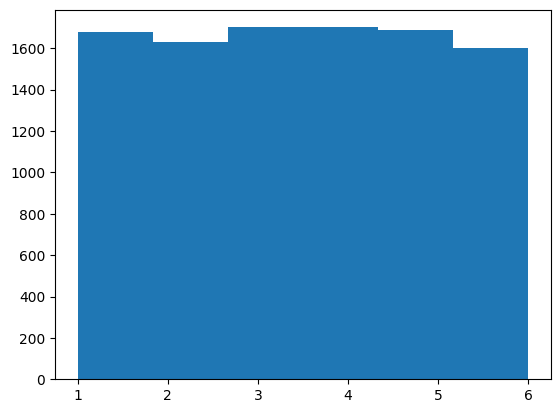

In [ ]:
x = np.random.choice(
    a=range(1, 7), # 1から6
    size=10000,   # 乱数の数
    replace=True
)
plt.hist(x, bins=6)

(array([1677., 1667., 1620., 1758., 1666., 1612.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

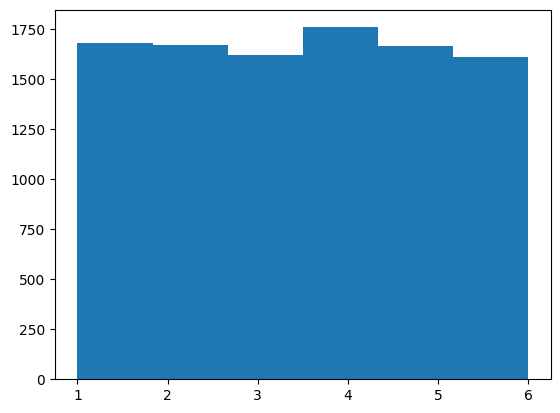

In [ ]:
x = np.random.randint(
    low=1,      # 最小
    high=7,     # 最大
    size=10000   # 乱数の数
)
plt.hist(x, bins=6)

(array([1655., 1631., 1672., 1700., 1651., 1691.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

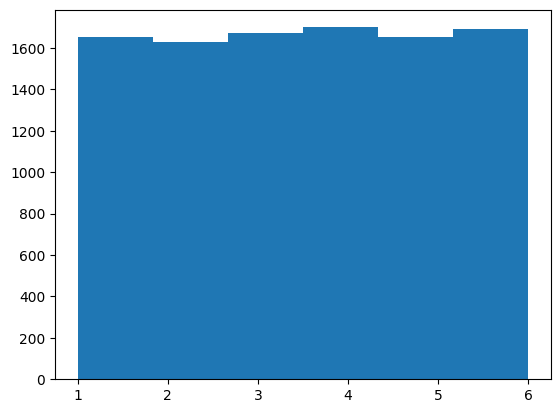

In [ ]:
 x = rng.integers(
    low=1,      # 最小
    high=7,     # 最大
    size=10000   # 乱数の数
)
plt.hist(x, bins=6)

(array([ 93., 100., 106.,  99.,  98., 114.,  82., 111., 103.,  94.]),
 array([4.21438943e-04, 1.00338708e-01, 2.00255978e-01, 3.00173247e-01,
        4.00090517e-01, 5.00007786e-01, 5.99925056e-01, 6.99842325e-01,
        7.99759595e-01, 8.99676864e-01, 9.99594134e-01]),
 <BarContainer object of 10 artists>)

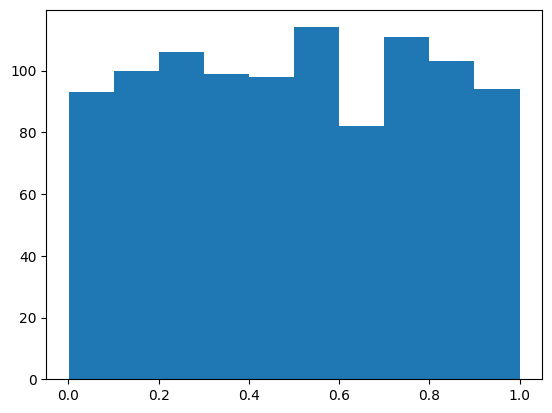

In [ ]:
x = np.random.random(size=1000)

#x = rng.random(size=1000)
#x = np.random.uniform(
    #low=0,
    #high=1,
    #size=1000
#)

plt.hist(x)

(array([151., 166., 173., 155., 168., 187.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

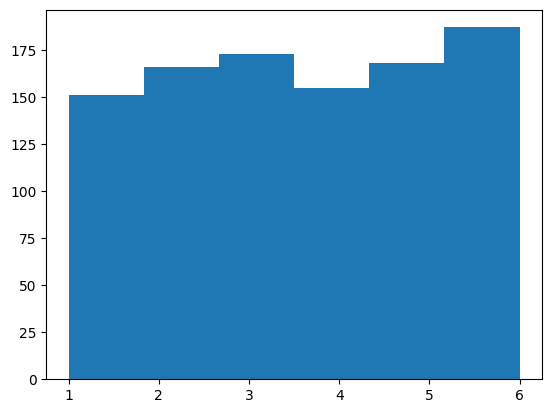

In [ ]:
tmp = np.random.uniform(
    low=1, # 最小
    high=7, # 最大+1
    size=1000 # 乱数の数
)
x = [int(k) for k in tmp]
plt.hist(x, bins=6) # 結果は割愛

(array([  1.,   2.,   2.,   5.,  23.,  26.,  59.,  79.,  93., 155., 240.,
        311., 381., 450., 543., 634., 736., 819., 789., 798., 772., 671.,
        541., 527., 370., 323., 208., 158., 115.,  74.,  36.,  29.,  14.,
          9.,   3.,   3.,   0.,   0.,   1.]),
 array([32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44.,
        45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
        58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
        71.]),
 <BarContainer object of 39 artists>)

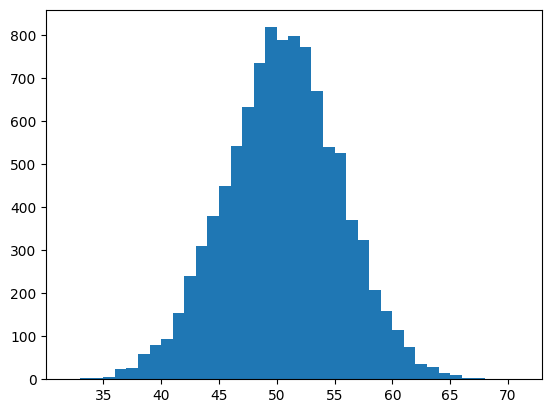

In [ ]:
# ４．３．３ 二項乱数
n = 100
p = 0.5
r = 10000
x = np.random.binomial(
#x = rng.binomial()
    n=n,    # 試行回数
    p=p,    # 確率
    size=r # 乱数の数
)
plt.hist(x, bins=max(x) - min(x))

(array([  2.,   1.,   2.,   6.,  15.,  10.,  31.,  41.,  62.,  96., 136.,
        187., 224., 307., 356., 468., 531., 551., 594., 670., 723., 742.,
        728., 680., 574., 485., 411., 351., 275., 225., 171., 116.,  81.,
         53.,  37.,  21.,  17.,   9.,   5.,   6.]),
 array([31.23932987, 32.13938951, 33.03944916, 33.9395088 , 34.83956845,
        35.73962809, 36.63968774, 37.53974738, 38.43980703, 39.33986667,
        40.23992632, 41.13998596, 42.04004561, 42.94010525, 43.8401649 ,
        44.74022454, 45.64028419, 46.54034383, 47.44040347, 48.34046312,
        49.24052276, 50.14058241, 51.04064205, 51.9407017 , 52.84076134,
        53.74082099, 54.64088063, 55.54094028, 56.44099992, 57.34105957,
        58.24111921, 59.14117886, 60.0412385 , 60.94129815, 61.84135779,
        62.74141744, 63.64147708, 64.54153673, 65.44159637, 66.34165602,
        67.24171566]),
 <BarContainer object of 40 artists>)

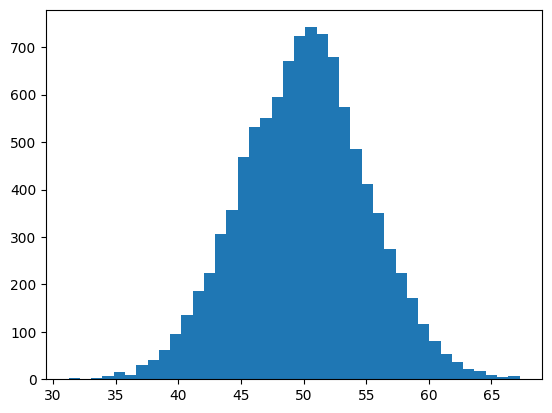

In [ ]:
r = 10000
x = np.random.normal(
#x = rng.normal(
    loc=50,     # 平均
    scale=5,     # 標準偏差
    size=r       # 乱数の数
)
plt.hist(x, bins=40)

In [ ]:
# 4.4.4.1 補足：不偏性の具体例
import numpy as np
import pandas as pd

def f(k):
  n = 10000
  tmp = [g(np.random.normal(size=k, scale=3)) for _ in range(n)]
  return pd.Series([
      k,
      np.mean(tmp),         # 平均
      np.std(tmp, ddof=1) / n**0.5],   # 標準偏差
      index=['k',  'mean', 'se']
  )

In [ ]:
def g(x):
  return np.var(x, ddof=1)
pd.Series([10, 20, 30]).apply(f)

,k,mean,se
0,10.0,9.035279,0.042809
1,20.0,8.992800,0.029337
2,30.0,8.999287,0.023539


In [ ]:
# √不偏分散
def g(x):
  return np.std(x, ddof=1)
pd.Series([10, 20, 30]).apply(f)

,k,mean,se
0,10.0,2.925804,0.007068
1,20.0,2.953564,0.004840
2,30.0,2.980606,0.003941


In [ ]:
from math import gamma

def g(x):
    n = len(x)
    return (
        np.std(x, ddof=1) *
        (
            np.sqrt((n - 1) / 2) *
            gamma((n - 1) / 2) /
            gamma(n / 2)
        )
)

pd.Series([10, 20, 30]).apply(f)

,k,mean,se
0,10.0,2.994243,0.007192
1,20.0,3.003624,0.004894
2,30.0,3.003460,0.003950


In [ ]:
def g(x):
    n = len(x)
    return (np.std(x, ddof=1) *
            (np.sqrt((n - 1) / 2) *
             gamma((n - 1) / 2) /
             gamma(n / 2)))
pd.Series([10, 20, 30]).apply(f)

,k,mean,se
0,10.0,2.994453,0.007220
1,20.0,3.001277,0.004901
2,30.0,2.992199,0.003937


In [5]:
# 4.4 統計的推測
from statsmodels.stats.proportion import binom_test, proportion_confint

binom_test(
    count=2,                # 当たった回数
    nobs=15,                # くじを引いた回数
    prop=4 / 10,            # 当たる確率(仮設)
    alternative='two-sided' # 両側検定(デフォルト)
                            # 左片側検定ならsmaller'
                            # 右片側検定なら7larger7
)

0.036461661552639996

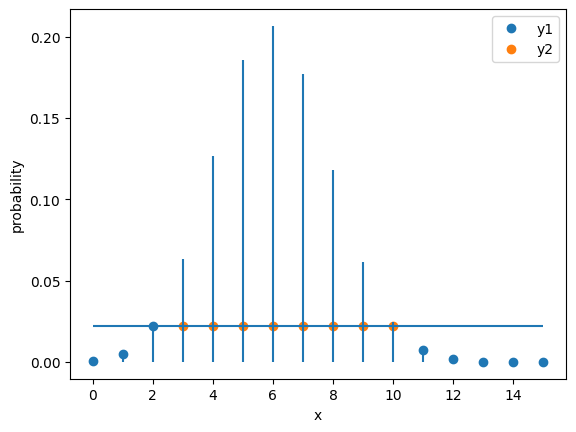

In [6]:
import numpy as np
import pandas as pd
from scipy import stats

t = 4 / 10                 # 当たる確率
n = 15                     # くじを引いた回数
x = np.array(range(0, n + 1)) # 当たった回数
my_pr  = stats.binom.pmf(x, n, t) # x回当たる確率
my_pr2 = stats.binom.pmf(2, n, t) # 2回当たる確率

my_data = pd.DataFrame({'x': x, 'y1': my_pr, 'y2': my_pr2})
my_data.loc[my_pr >  my_pr2, 'y1'] = np.nan # 当たる確率が，2回当たる確率超過
my_data.loc[my_pr <= my_pr2, 'y2'] = np.nan # 当たる確率が，2回当たる確率以下
ax = my_data.plot(x='x', style='o', ylabel='probability', legend='False') # 凡例を表示しない
ax.hlines(y=my_pr2, xmin=0, xmax=15)    # 水平線
ax.vlines(x=x,      ymin=0, ymax=my_pr) # 垂直線



In [11]:
# 4.4.2 推定
a = 0.05
proportion_confint(
    count=2, # 当たった回数
    nobs=15, # くじを引いた回数
    alpha=a, # 有意水準(省略可)
    method='binom_test'
)

TypeError: ignored

In [12]:
a = 0.05
proportion_confint(
    count=2, # 当たった回数
    nobs=15, # くじを引いた回数
    alpha=a, # 有意水準（省略可）
    method='binom_test')

TypeError: ignored

<Axes: xlabel='$\\theta$', ylabel='p-value'>

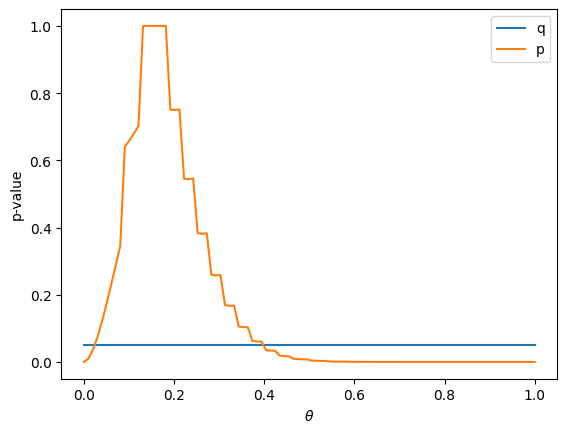

In [10]:
a = 0.05 # 有意水準
tmp = np.linspace(0, 1, 100)

my_df = pd.DataFrame({
    't': tmp,                                               # 当たる確率
    'q': a,                                                 # 水平線
    'p':[binom_test(count=2, nobs=15, prop=t) for t in tmp] # p値
})

my_df.plot(x='t', legend='False', xlabel=r'$\theta$', ylabel=r'p-value')

In [15]:
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW

X = [32.1, 26.2, 27.5, 31.8, 32.1, 31.2, 30.1, 32.4, 32.3, 29.9,
     29.6, 26.6, 31.2, 30.9, 29.3]
Y = [35.4, 34.6, 31.1, 32.4, 33.3, 34.7, 35.3, 34.3, 32.1, 28.3,
     33.3, 30.5, 32.6, 33.3, 32.2]

a = 0.05          # 有意水準（デフォルト） = 1 - 信頼係数
alt = 'two-sided' # 両側検定（デフォルト）
                  # 左片側検定なら'smaller'
                  # 右片側検定なら'larger'
d = DescrStatsW(np.array(X) - np.array(Y)) # 対標本の場合
d.ttest_mean(alternative=alt)[1]           # p値

0.0006415571512322235

In [16]:
d.tconfint_mean(alpha=a, alternative=alt) # 信頼区間

(-3.9955246743198867, -1.3644753256801117)

In [17]:
c = CompareMeans(DescrStatsW(X), DescrStatsW(Y))
ve = 'pooled'
c.ttest_ind(alternative=alt, usevar=ve)[1] # p値


0.000978530937238609

In [18]:
c.tconfint_diff(alpha=a, alternative=alt, usevar=ve) # 信頼区間


(-4.170905570517185, -1.1890944294828283)

In [19]:
import pandas as pd
my_url = (
    'https://raw.githubusercontent.com/taroyabuki'
    '/fromzero/master/data/smoker.csv'
)
my_data = pd.read_csv(my_url)

In [20]:
my_data.head()

,alive,smoker
0,Yes,No
1,Yes,No
2,Yes,No
3,Yes,No
4,Yes,No


In [21]:
my_table = pd.crosstab(
    my_data['alive'],
    my_data['smoker']
)
my_table

smoker,No,Yes
alive,,
No,117,54
Yes,950,348


In [22]:
from scipy.stats import chi2_contingency

chi2_contingency(my_table, correction=False)[1]

0.18860725715300422

In [23]:
X = [0] * 13 + [1] * 2 # 手順1
X

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

In [24]:
tmp = np.random.choice(X, 15, replace=True) # 手順2
tmp

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
sum(tmp) # 手順3


3

In [26]:
n = 10**5
result = [sum(np.random.choice(X, len(X), replace=True)) for _ in range(n)] # 手順4


(array([1.1621e+04, 2.6898e+04, 2.9122e+04, 1.9402e+04, 8.9130e+03,
        3.0370e+03, 8.4000e+02, 1.5100e+02, 1.4000e+01, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15.]),
 <BarContainer object of 15 artists>)

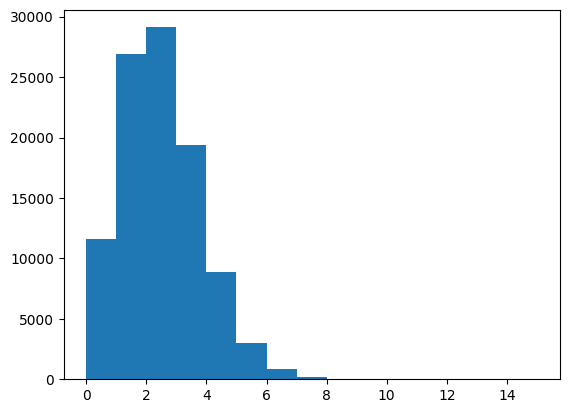

In [27]:
import matplotlib.pyplot as plt
plt.hist(result, bins=range(0, 16))

In [28]:
np.quantile(result, [0.025, 0.975])


array([0., 5.])